# Flood Prediction by Time Series Analysis using ARIMA Model

<h3>Disclaimer</h3>

<i>So this method is rather an unconventional one. The problem given can be solved by using Logistic Regression and SVM models or alternatively by a Neural Network if the features are engineered properly.
As we were asked to be as innovative as possible, I decided to go for Time Series Analysis using ARIMA model which is a quite complicated statistical model. 
As of now I don't understand the model completely and I'm studying it but i got help from the internet to understand and get a model up and running. 
Note that the code below does not generate the best model possible for the problem but with proper use of mathematical concepts and hyperparameter tuning this model could perform better than any other model possible.
    </i>

<h3>Model Summary</h3>

<p>The main idea is to forecast the rainfall data for the next 10 years.<br>
    Then we calculate the standard deviation in the prediction data.<br>
    1. If the amount of rainfall entered by the user is more than (mean + std deviation) and (prediction + 0.7*std deviation) then we output 2 i.e: Flood is likely to occur<br>
    2. If the amount of rainfall entered by the user is more than (mean + std deviation) or (prediction + std deviation) then we output 1 i.e: There are chances of flood to occur.<br>
    3. Else we ouput 0 i.e: Flood is unlikely to occur.<br><br>
    <i>Note: I'm not using the Flood Dates sheet provided as I feel that the occurence of flood depends lot more on environmental and geographical factors than the history of flood occurences. This model cannot be generalized to all the areas. Some regions might get flooded on receiving 150 cm of rainfall while for some receiving 200-250 cm of rainfall is normal and does not cause any devastation.</i><br>
</p>

<h4>Importing the required Libraries</h4>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX 

<h4>Loading Data and Modeling</h4>

In [39]:
rainfall = pd.read_excel('rainfall.xlsx')
rainfall.columns


Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'TOTAL'],
      dtype='object')

<i>Now we take the 'OCT' column to build and test our model.</i>

In [40]:
stepwise_fit = auto_arima(rainfall['OCT'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore', 
                          suppress_warnings = True, 
                          stepwise = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=562.449, BIC=571.255, Time=0.263 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=579.910, BIC=583.433, Time=0.016 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=560.880, BIC=567.925, Time=0.234 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=558.895, BIC=565.940, Time=0.250 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=578.371, BIC=580.132, Time=0.000 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=578.648, BIC=583.932, Time=0.062 seconds
Fit ARIMA(1,0,0)x(2,1,0,12) [intercept=True]; AIC=554.964, BIC=563.770, Time=0.601 seconds
Fit ARIMA(1,0,0)x(2,1,1,12) [intercept=True]; AIC=553.465, BIC=564.032, Time=1.095 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 12); setting s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                   55
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood                -270.757
Date:                    Fri, 24 Jul 2020   AIC                            551.514
Time:                            12:35:04   BIC                            560.320
Sample:                                 0   HQIC                           554.762
                                     - 55                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     24.1965     24.335      0.994      0.320     -23.498      71.891
ar.S.L12      -0.8684      0.672     -1.293      0.196      -2.185       0.448
ar.S.L24      -0.3842      0.530     -0.725      0.468      -1.422       0.654
ma.S.L12      -0.9946    198.086     -0.005      0.996    -389.236     387.247
sigma2      6619.3579   1.31e+06      0.005      0.996   -2.55e+06    2.57e+06
===================================================================================
Ljung-Box (Q):                       32.53   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.79   Prob(JB):                         0.71
Heteroskedasticity (H):               0.71   Skew:                             0.29
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""




<i>
    
    
    So we see that the optimal model is SARIMAX(2,1,1,12) which is 'Seasonal ARIMA with exogenous variables'.
    Actually I don't know much about it :P But it is to be inferred that the seasonal_order parameter for the model is to be set as (2, 1, 1, 12)


</i>

In [41]:
model = SARIMAX(rainfall['OCT'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary()

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                OCT   No. Observations:                   55
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -267.210
Date:                            Fri, 24 Jul 2020   AIC                            544.419
Time:                                    12:35:08   BIC                            553.107
Sample:                                         0   HQIC                           547.604
                                             - 55                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7840      0.119     -6.595      0.000      -1.017      -0.551
ar.S.L12      -0.7628      0.255     -2.994      0.003      -1.262      -0.263
ar.S.L24      -0.3188      0.241     -1.321      0.186      -0.792       0.154
ma.S.L12      -0.9974      0.355     -2.812      0.005      -1.692      -0.302
sigma2      7971.1303   4.47e-05   1.79e+08      0.000    7971.130    7971.130
===================================================================================
Ljung-Box (Q):                       28.75   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.91   Prob(JB):                         0.78
Heteroskedasticity (H):               0.68   Skew:                            -0.26
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.15e+23. Standard errors may be unstable.
"""

<i>
   
    
    Now that we have built the model we will forecast the rainfall for next 10 years.
    I chose 10 as we can observe a general pattern in the weather for that period.
    The weather tends to shift or change over a large period.
</i>    

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


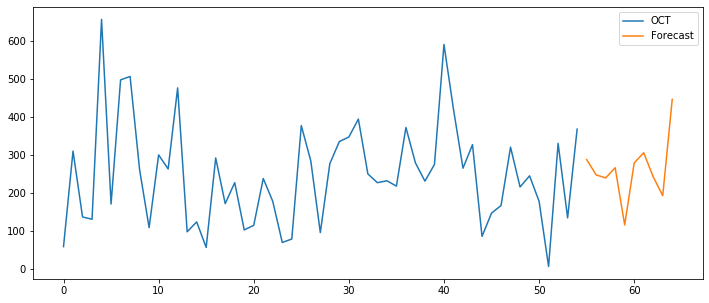

In [42]:
model = SARIMAX(rainfall['OCT'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(rainfall),  
                          end = (len(rainfall)-1) + 10,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
rainfall['OCT'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

<i>
    
    
    So we see that our model has captured the general characterictics of rainfall received.
    Howerver, the standard deviation in our prediction is quite smaller than the one observed in the past data.
    This can be resolved by tuning the parameters of the model. But again, I don't know much about this model so this is the best I can present for now.
</i>

In [43]:
forecast

55    287.755176
56    247.429504
57    239.456237
58    266.262351
59    116.034077
60    278.704826
61    305.616209
62    242.375866
63    192.956883
64    445.973188
Name: Forecast, dtype: float64

<h3>The Model, Formally</h3>

In [44]:
#Helper function

def getMonth(monthInt):
    Months = {1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR', 5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG', 9: 'SEP', 10: 'OCT', 11: 'NOV', 12: 'DEC'}
    return Months[monthInt]


In [45]:
def getForecast(monthInt):
    month = getMonth(monthInt)
    model = SARIMAX(rainfall[month],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
    result = model.fit() 
    result.summary()
    
    
    model = SARIMAX(rainfall[month],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
    result = model.fit() 
  
    # Forecast for the next 12 years 
    forecast = result.predict(start = len(rainfall),  
                          end = (len(rainfall)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
    # Plot the forecast values 
    rainfall[month].plot(figsize = (12, 5), legend = True) 
    forecast.plot(legend = True)
    return forecast

In [54]:
def predict(monthInt, inputRain):
    forecast = getForecast(monthInt)
    meanForecast = forecast.mean()
    std = forecast.std()
    threshold1 = meanForecast + std
    threshold2 = forecast.iloc[0] + (0.8 * std)
    threshold3 = forecast.iloc[0] + std
    if (inputRain > threshold1 and inputRain > threshold2):
        print("\n %2d : Flood is likely to occur" % (2))
    elif (inputRain > threshold1 or inputRain > threshold3):
        print("\n %2d : There are chances of flood" % (1))
    else:
        print("\n %2d : Flood is unlikely to occur" % (0))
        

Enter month number: 12
Enter rainfall amount: 415


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



  2 : Flood is likely to occur


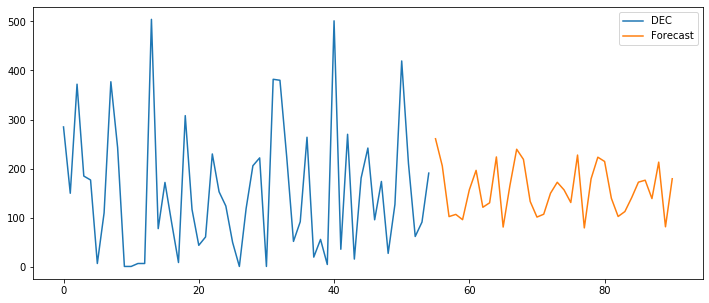

In [62]:
# Driver Code
month = int(input('Enter month number: '))
rain = int(input('Enter rainfall amount: '))
predict(month, rain)